In [31]:
# Explanation of prediction output when activation is sigmoid:
# https://forum.freecodecamp.org/t/model-predict-output/470349

import tensorflow as tf
import tensorflow_datasets as tfds
import logging, os
import pandas as pd
import time
from tensorflow.keras.models import load_model
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

BASE_PATH = "../../../../../local_data/practice/tfds/"
DATA_PATH = "../../../../../local_data/tfds/"
OUTPUT_PATH = BASE_PATH+"cats_vs_dogs/"
os.system("mkdir -p " + OUTPUT_PATH)

0

In [32]:
import tensorflow_datasets as tfds

DATA_PATH = "../../../../../local_data/datasets/animals/"
# Initialize the ImageFolder dataset
builder = tfds.ImageFolder(DATA_PATH)

# Print dataset information
metadata=builder.info
print(builder.info)  # This will show the number of examples, labels, etc.

# Create the dataset
# test_dataset = builder.as_dataset(
#     split='test',
#     shuffle_files=True
# )
(train_dataset, test_dataset)= builder.as_dataset(
    split=['train', 'test'],
    shuffle_files=False,
)
print(f"Number of test samples: {test_dataset.cardinality()}")

tfds.core.DatasetInfo(
    name='image_folder',
    full_name='image_folder/1.0.0',
    description="""
    Generic image classification dataset.
    """,
    homepage='https://www.tensorflow.org/datasets/catalog/image_folder',
    data_path='../../../../../local_data/datasets/animals/',
    file_format=tfrecord,
    download_size=Unknown size,
    dataset_size=Unknown size,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'image/filename': Text(shape=(), dtype=string),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=7, num_shards=1>,
        'train': <SplitInfo num_examples=7, num_shards=1>,
    },
    citation="""""",
)
Number of test samples: 7


In [33]:
print("train_dataset=",train_dataset)

train_dataset= <_PrefetchDataset element_spec={'image': TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), 'image/filename': TensorSpec(shape=(), dtype=tf.string, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>


In [34]:
for element in train_dataset.take(5):
    # print(element['image'])
    print(element['image/filename'])
    print(element['label'])

tf.Tensor(b'../../../../../local_data/datasets/animals/train/cat/cat_0002.png', shape=(), dtype=string)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(b'../../../../../local_data/datasets/animals/train/dog/dog_0003.png', shape=(), dtype=string)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(b'../../../../../local_data/datasets/animals/train/dog/dog_0002.png', shape=(), dtype=string)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(b'../../../../../local_data/datasets/animals/train/cat/cat_0004.png', shape=(), dtype=string)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(b'../../../../../local_data/datasets/animals/train/dog/dog_0001.png', shape=(), dtype=string)
tf.Tensor(1, shape=(), dtype=int64)


In [27]:
for element in train_dataset.take(1):
    tuple_result = tuple(element.items())
    # print(tuple_result)
    a,b,c=tuple_result
    # print(c)
    for images, labels in tuple_result:
        print(labels)

tf.Tensor(
[[[126 124 123]
  [126 124 123]
  [126 124 123]
  ...
  [186 184 171]
  [186 184 171]
  [187 185 172]]

 [[126 124 123]
  [126 124 123]
  [126 124 123]
  ...
  [184 181 168]
  [185 182 170]
  [185 182 170]]

 [[126 124 123]
  [126 124 123]
  [126 124 123]
  ...
  [181 179 166]
  [181 179 166]
  [181 179 166]]

 ...

 [[175 175 171]
  [175 175 171]
  [176 177 172]
  ...
  [169 165 159]
  [169 165 159]
  [169 165 159]]

 [[176 174 173]
  [176 174 173]
  [176 174 173]
  ...
  [169 165 159]
  [169 165 159]
  [169 165 159]]

 [[176 174 173]
  [176 174 173]
  [176 174 173]
  ...
  [170 166 160]
  [170 166 160]
  [170 166 160]]], shape=(530, 500, 3), dtype=uint8)
tf.Tensor(b'../../../../../local_data/datasets/animals/train/cat/cat_0002.png', shape=(), dtype=string)
tf.Tensor(0, shape=(), dtype=int64)


In [28]:
for element in train_dataset.take(1):
    items_list = list(element.items()) 
    print(items_list)  

[('image', <tf.Tensor: shape=(530, 500, 3), dtype=uint8, numpy=
array([[[126, 124, 123],
        [126, 124, 123],
        [126, 124, 123],
        ...,
        [186, 184, 171],
        [186, 184, 171],
        [187, 185, 172]],

       [[126, 124, 123],
        [126, 124, 123],
        [126, 124, 123],
        ...,
        [184, 181, 168],
        [185, 182, 170],
        [185, 182, 170]],

       [[126, 124, 123],
        [126, 124, 123],
        [126, 124, 123],
        ...,
        [181, 179, 166],
        [181, 179, 166],
        [181, 179, 166]],

       ...,

       [[175, 175, 171],
        [175, 175, 171],
        [176, 177, 172],
        ...,
        [169, 165, 159],
        [169, 165, 159],
        [169, 165, 159]],

       [[176, 174, 173],
        [176, 174, 173],
        [176, 174, 173],
        ...,
        [169, 165, 159],
        [169, 165, 159],
        [169, 165, 159]],

       [[176, 174, 173],
        [176, 174, 173],
        [176, 174, 173],
        ...,
        [1

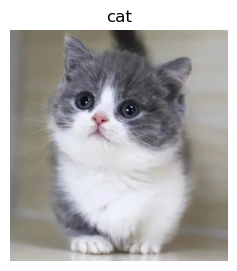

In [29]:
plt.figure(figsize=(3, 3))
for element in train_dataset.take(1):
    image=element['image']
    label=element['label']
    plt.imshow(image)
    plt.title(metadata.features['label'].int2str(label))
    plt.axis("off")

In [30]:
def dict_to_tuple(data):
    print(data)
    # return data['image'], data['label']

train_dataset = train_dataset.map(dict_to_tuple)
print("train_dataset=",train_dataset)

{'image': <tf.Tensor 'args_0:0' shape=(None, None, 3) dtype=uint8>, 'image/filename': <tf.Tensor 'args_1:0' shape=() dtype=string>, 'label': <tf.Tensor 'args_2:0' shape=() dtype=int64>}


InvalidArgumentError: Length for attr 'output_shapes' of 0 must be at least minimum 1
	; NodeDef: {{node MapDataset}}; Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=metadata:string,default=""> [Op:MapDataset] name: 

In [ ]:
# # Preprocess the data
# def preprocess(image, label):
#     image = tf.cast(image, tf.float32)
#     image = tf.image.resize(image, [256, 256])
#     image = image / 255.0
#     return image, label

# # train_dataset = train_dataset.map(preprocess)
# test_dataset = test_dataset.map(preprocess)

# batch_size = 64
# # train_dataset = train_dataset.cache().batch(batch_size).prefetch(buffer_size=10)
# test_dataset = test_dataset.cache().batch(batch_size).prefetch(buffer_size=10)

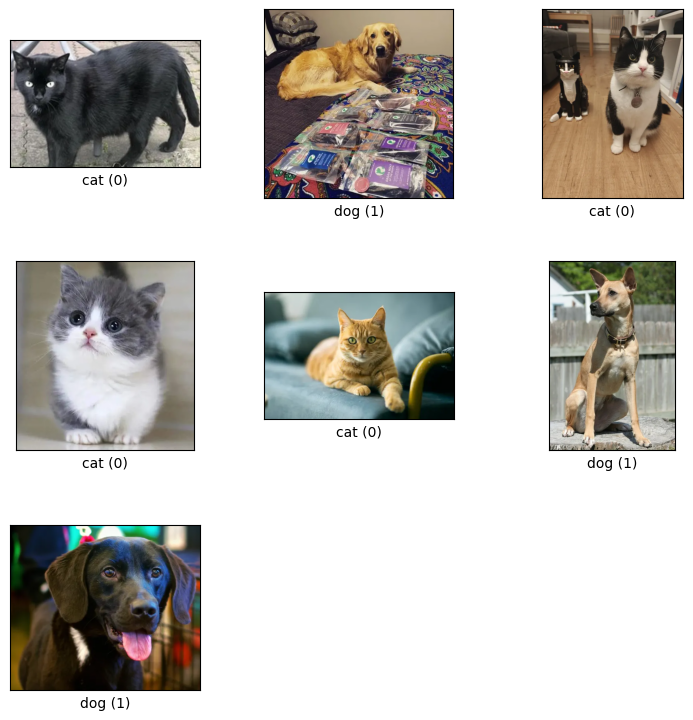

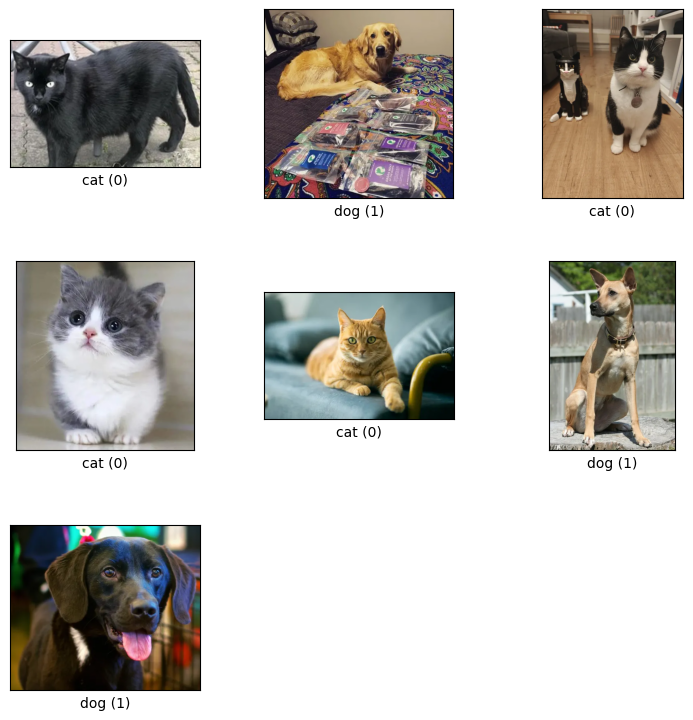

In [ ]:
# Display examples
tfds.show_examples(test_dataset, builder.info)

In [ ]:
tfds.as_dataframe(test_dataset.take(8))

,image,image/filename,label
0,[[[121 131 121] [120 128 119] [131 137 128] ... [131 126 112] [126 121 107] [122 118 103]] [[121 131 121] [120 128 119] [131 137 128] ... [125 120 106] [121 117 102] [118 113 99]] [[122 133 122] [120 128 119] [130 136 127] ... [129 125 110] [126 121 107] [122 118 103]] ... [[162 170 149] [160 168 147] [149 157 136] ... [206 199 181] [210 204 186] [214 208 189]] [[153 161 140] [151 158 138] [140 148 127] ... [202 194 176] [202 194 176] [206 197 180]] [[144 151 131] [146 154 133] [140 148 127] ... [205 196 179] [201 193 175] [206 197 180]]],b'../../../../../local_data/datasets/animals/test/cat/cat_0004.png',0
1,[[[ 17 16 24] [ 17 16 24] [ 17 16 24] ... [182 165 141] [182 165 141] [182 165 141]] [[ 17 16 24] [ 17 16 24] [ 17 16 24] ... [182 165 141] [182 165 141] [182 165 141]] [[ 17 16 24] [ 17 16 24] [ 17 16 24] ... [182 165 141] [182 165 141] [182 165 141]] ... [[ 31 44 21] [ 29 43 27] [ 29 44 34] ... [ 18 26 85] [ 15 24 82] [ 13 22 80]] [[ 65 83 58] [ 65 81 64] [ 62 80 69] ... [ 15 24 82] [ 14 23 81] [ 13 22 80]] [[ 42 62 37] [ 62 81 63] [ 87 107 96] ... [ 14 23 81] [ 13 22 80] [ 14 23 81]]],b'../../../../../local_data/datasets/animals/test/dog/dog_0001.png',1
2,[[[ 42 37 36] [ 42 37 36] [ 42 37 36] ... [ 35 29 33] [ 37 30 35] [ 30 23 28]] [[ 42 37 36] [ 42 37 36] [ 42 37 36] ... [ 29 23 20] [ 33 26 24] [ 43 37 34]] [[ 42 37 36] [ 42 37 36] [ 42 37 36] ... [ 60 54 45] [ 98 93 81] [132 127 115]] ... [[170 129 86] [172 131 88] [177 136 93] ... [186 145 104] [185 144 103] [188 147 106]] [[170 129 86] [172 131 88] [177 136 93] ... [186 145 104] [187 146 105] [188 147 106]] [[170 129 86] [172 131 88] [177 136 93] ... [197 156 113] [190 149 106] [187 146 103]]],b'../../../../../local_data/datasets/animals/test/cat/cat_0001.png',0
3,[[[126 124 123] [126 124 123] [126 124 123] ... [186 184 171] [186 184 171] [187 185 172]] [[126 124 123] [126 124 123] [126 124 123] ... [184 181 168] [185 182 170] [185 182 170]] [[126 124 123] [126 124 123] [126 124 123] ... [181 179 166] [181 179 166] [181 179 166]] ... [[175 175 171] [175 175 171] [176 177 172] ... [169 165 159] [169 165 159] [169 165 159]] [[176 174 173] [176 174 173] [176 174 173] ... [169 165 159] [169 165 159] [169 165 159]] [[176 174 173] [176 174 173] [176 174 173] ... [170 166 160] [170 166 160] [170 166 160]]],b'../../../../../local_data/datasets/animals/test/cat/cat_0002.png',0
4,[[[199 211 207] [197 209 205] [192 204 200] ... [ 48 78 84] [ 46 77 83] [ 46 77 83]] [[197 209 205] [193 206 201] [190 202 198] ... [ 48 78 84] [ 46 77 83] [ 46 77 83]] [[192 204 200] [190 202 198] [185 197 193] ... [ 49 80 85] [ 48 78 84] [ 48 78 84]] ... [[104 132 139] [104 132 139] [104 132 139] ... [ 0 8 7] [ 0 8 7] [ 0 8 7]] [[104 132 139] [104 132 139] [104 132 139] ... [ 0 8 7] [ 0 8 7] [ 0 8 7]] [[103 131 138] [103 131 138] [103 131 138] ... [ 0 8 7] [ 0 8 7] [ 0 8 7]]],b'../../../../../local_data/datasets/animals/test/cat/cat_0003.png',0
5,[[[ 71 93 40] [ 73 95 44] [ 77 98 52] ... [ 60 70 35] [ 60 70 35] [ 60 70 35]] [[ 71 93 40] [ 73 95 44] [ 77 98 52] ... [ 61 71 36] [ 61 71 36] [ 61 71 36]] [[ 71 93 40] [ 73 95 44] [ 77 98 52] ... [ 62 72 37] [ 62 72 37] [ 62 72 37]] ... [[ 93 90 82] [ 38 35 27] [ 4 1 0] ... [104 102 69] [ 61 59 28] [125 123 92]] [[ 92 88 80] [106 102 94] [ 72 69 61] ... [133 131 100] [118 116 87] [113 111 82]] [[ 79 76 68] [ 92 88 80] [ 58 55 47] ... [106 104 75] [ 98 95 69] [ 94 92 65]]],b'../../../../../local_data/datasets/animals/test/dog/dog_0003.png',1
6,[[[ 2 2 2] [ 2 2 2] [ 2 2 2] ... [ 24 37 42] [ 24 37 42] [ 24 37 42]] [[ 2 2 2] [ 2 2 2] [ 2 2 2] ... [ 24 37 42] [ 24 37 42] [ 24 37 42]] [[ 2 2 2] [ 2 2 2] [ 2 2 2] ... [ 24 37 42] [ 24 37 42] [ 24 37 42]] ... [[106 82 6] [106 82 6] [106 82 6] ... [ 45 27 10] [ 42 25 8] [ 40 22 5]] [[106 82 6] [106 82 6] [106 82 6] ... [ 46 28 11] [ 43 26 9] [ 42 25 8]] [[105 81 5] [105 81 5] [105 81 5] ... [ 46 28 11] [ 43 26 9] [ 42 25 8]]],b'../../../../../local_data/datasets/animals/test/dog/dog